In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 51.6MB/s 
     |████████████████████████████████| 450kB 62.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6f5cf75ac34163dc77281c839b96905277f1e399e23ccb93eb71a85484bee78b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [ ]:
!nvidia-smi

Sun Apr 19 11:52:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
%%time
!unzip "/content/drive/My Drive/trian.zip" -d "/content/traindata"

Streaming output truncated to the last 5000 lines.
  inflating: /content/traindata/content/drive/My Drive/train/img5201_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5202_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5203_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5204_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5205_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5206_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5207_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5208_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5209_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5210_label0.jpg  
  inflating: /content/traindata/content/drive/My Drive/train/img5211_label0.jpg  
  inflating: /content/traindata/content/drive/M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install /content/efficientnet-1.1.0-py3-none-any.whl

Processing ./efficientnet-1.1.0-py3-none-any.whl


In [ ]:
import os
directory=os.listdir('/content/drive/My Drive/train')
directoryt=os.listdir('/content/drive/My Drive/test')
#2 clases of 18 files per class of 10 min data each
print(len(directory))
print(len(directoryt))

21600
1200


In [ ]:
import cv2
from tqdm.notebook import tqdm
import numpy as np

In [ ]:
# Loading validation and training data
def load_train():
  train_img=[]
  train_label=[]
  val_img=[]
  val_label=[]
  for i in tqdm(range(len(directory))):
    if i>9000 and i<12000:
      final_path=os.path.join('/content/traindata/content/drive/My Drive/train',directory[i])
      img=cv2.imread(final_path)
      val_img.append(img)
      val_label.append(int(directory[i][-5]))
    elif i>18000 and i<21000:
      final_path=os.path.join('/content/traindata/content/drive/My Drive/train',directory[i])
      img=cv2.imread(final_path)
      val_img.append(img)
      val_label.append(int(directory[i][-5]))  
    else:
      final_path=os.path.join('/content/traindata/content/drive/My Drive/train',directory[i])
      img=cv2.imread(final_path)
      train_img.append(img)
      train_label.append(int(directory[i][-5]))

  return train_img,train_label,val_img,val_label
  # Label 1 is Interictal data and 0 is preictal data

In [ ]:
train_img,train_label,val_img,val_label=load_train()

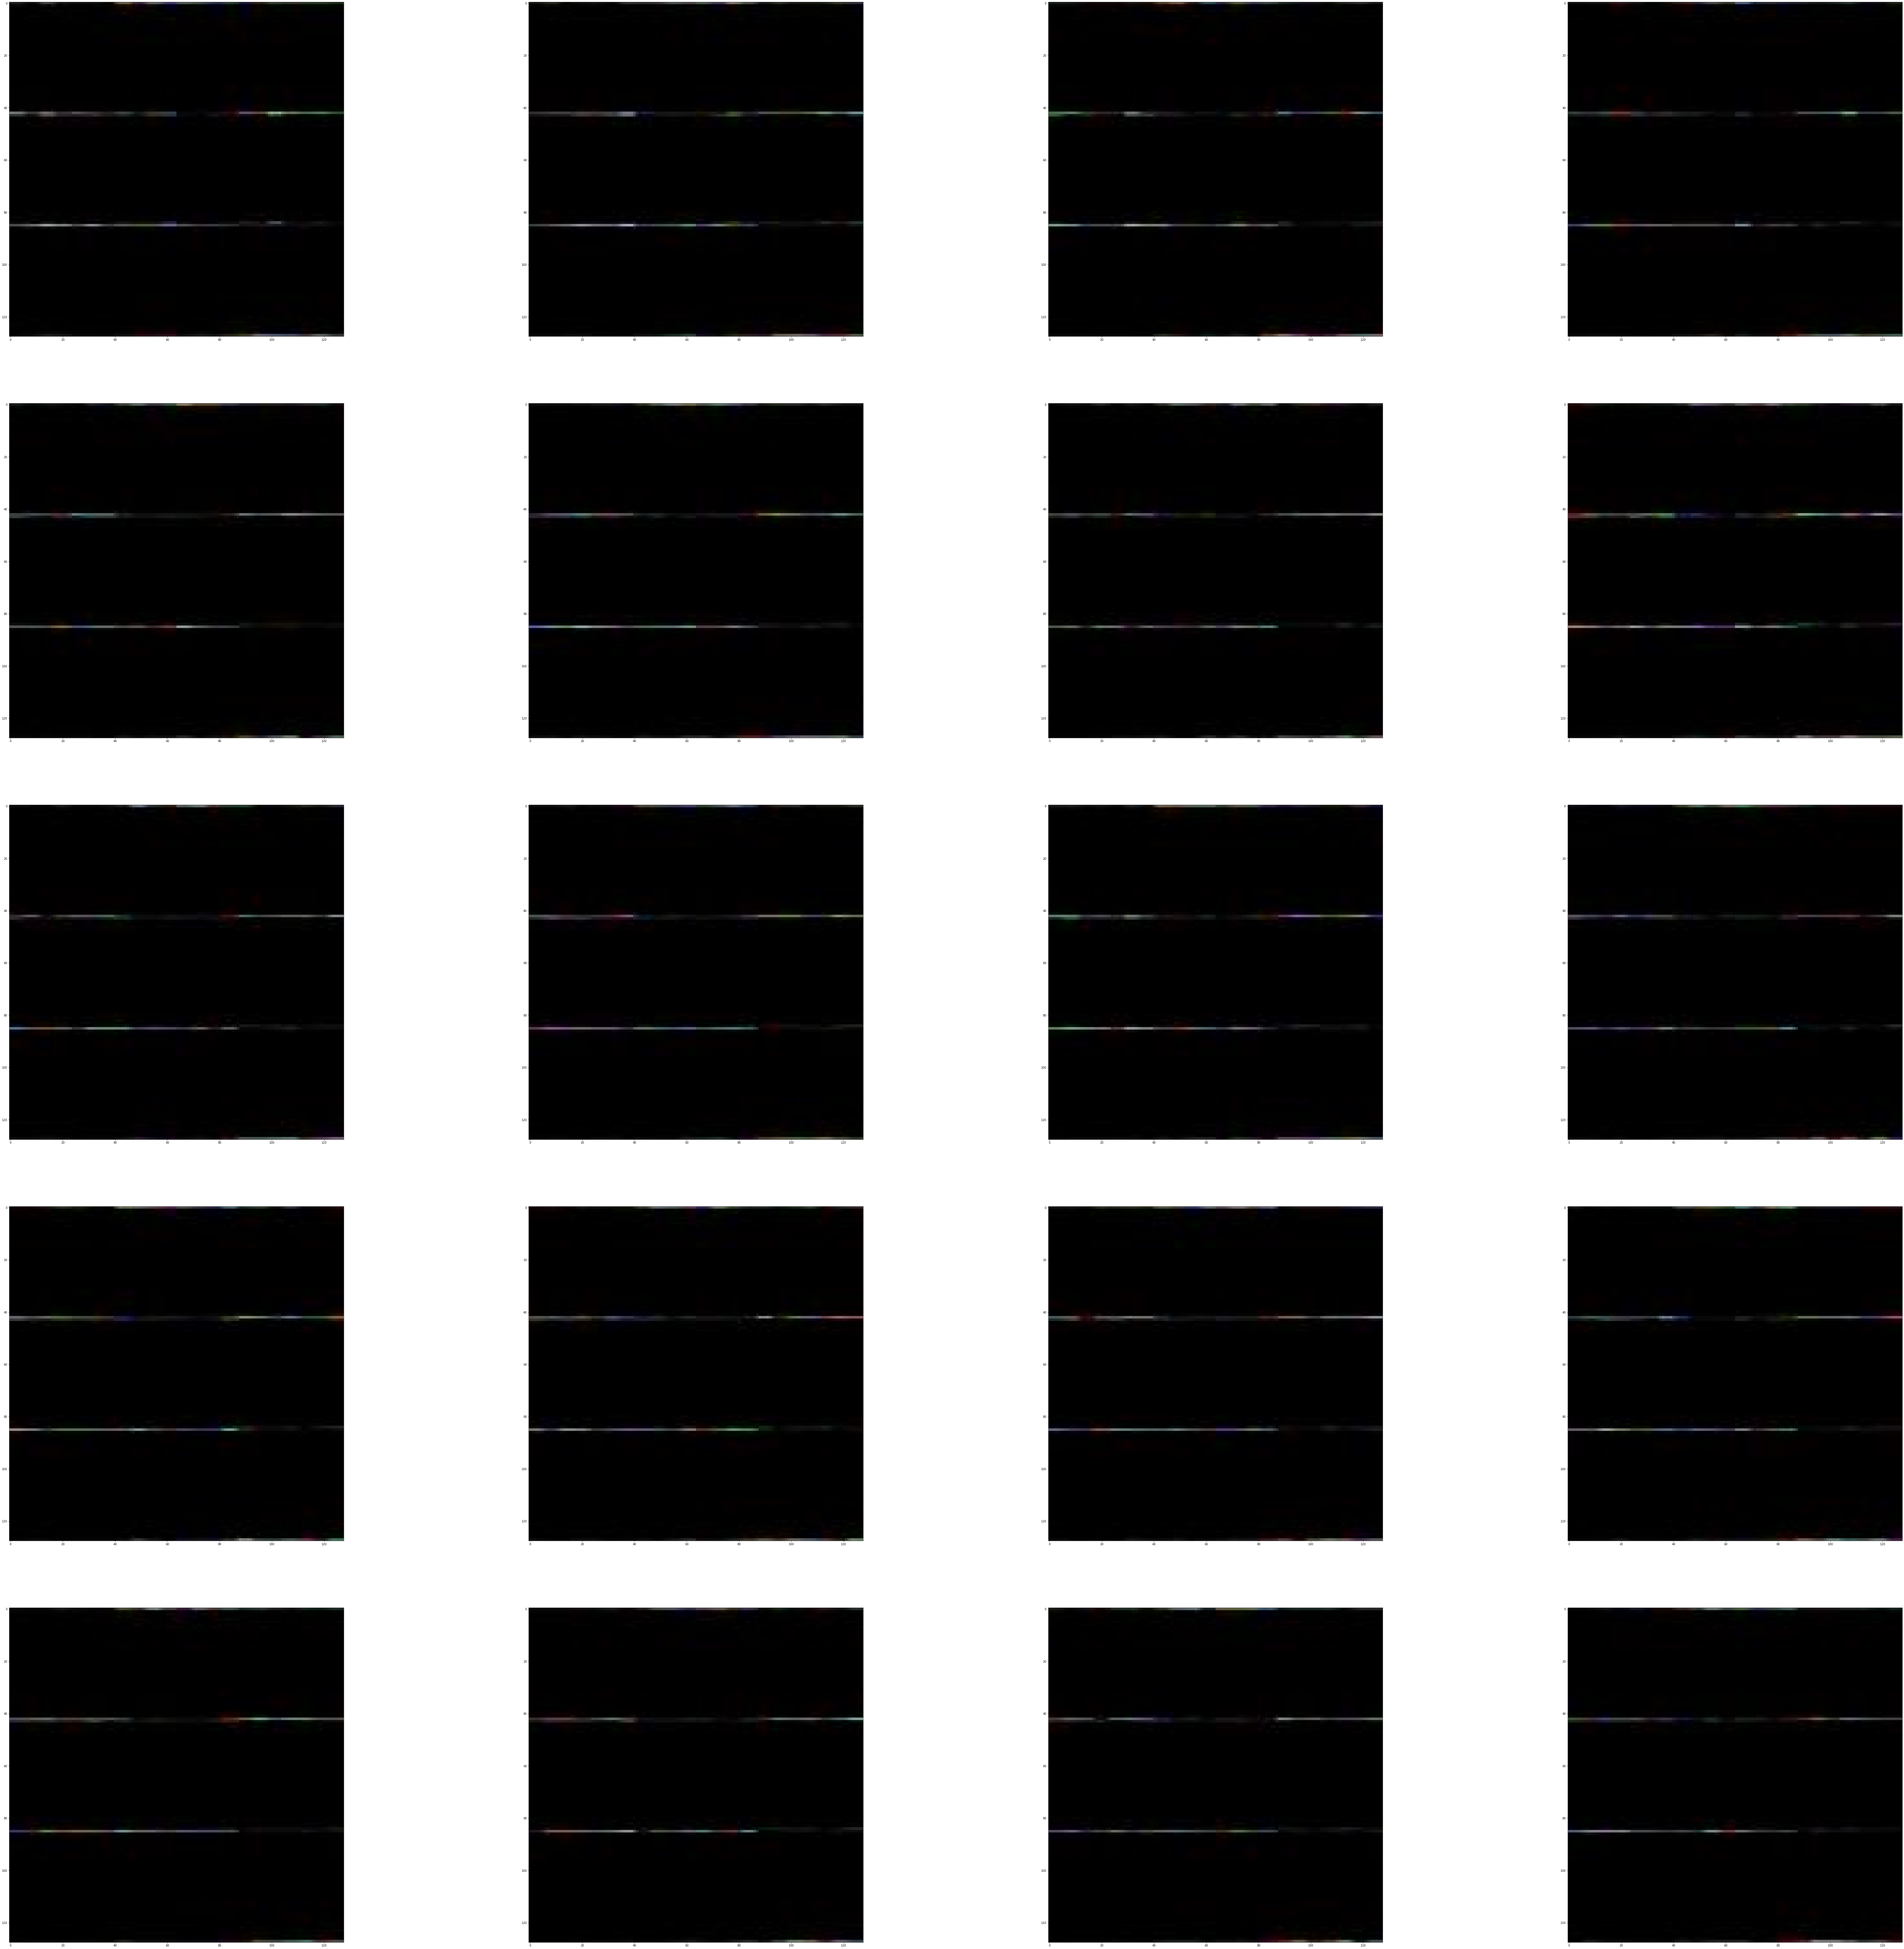

In [ ]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_img[i])
plt.show()

In [ ]:
#making numpy arrays
x_train=np.asarray(train_img)
y_train=np.asarray(train_label)
x_val=np.asarray(val_img)
y_val=np.asarray(val_label)

In [ ]:
#freeing up ram
del train_img
del val_img

In [ ]:
from tqdm.notebook import tqdm
import cv2

def load_test():
  test_img=[]
  test_label=[]
  for i in tqdm(range(len(directoryt))):
    final_path=os.path.join('/content/drive/My Drive/test',directoryt[i])
    img=cv2.imread(final_path)
    test_img.append(img)
    test_label.append(int(directoryt[i][-5]))
  return test_img,test_label

In [ ]:
test_img,test_label=load_test()

In [ ]:
import numpy as np
testset=[]
for ele in test_img:
  arr=np.asarray(ele)
  arr=np.expand_dims(arr, axis=0)
  testset.append(arr)

# EFFICIENTNET

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from tensorflow.keras import layers as L
import efficientnet.tfkeras as efn
from tensorflow.keras.utils import to_categorical

In [ ]:
#EfficientNet
def normalize(image):
  # https://github.com/tensorflow/tpu/blob/master/models/official/efficientnet/main.py#L325-L326
  # https://github.com/tensorflow/tpu/blob/master/models/official/efficientnet/efficientnet_builder.py#L31-L32
  image -= tf.constant([0.485 * 255, 0.456 * 255, 0.406 * 255])  # RGB
  image /= tf.constant([0.229 * 255, 0.224 * 255, 0.225 * 255])  # RGB
  #officially given by pytorch.
  return image

def get_model(input_size, backbone='efficientnet-b3', weights='imagenet', tta=False):
  print(f'Using backbone {backbone} and weights {weights}')
  x = L.Input(shape=input_size, name='imgs', dtype='float32')
  y = normalize(x)
  if backbone.startswith('efficientnet'):
    model_fn = getattr(efn, f'EfficientNetB{backbone[-1]}')

  y = model_fn(input_shape=input_size, weights=weights, include_top=False)(y)
  y = L.GlobalAveragePooling2D()(y)
  y = L.Dropout(0.2)(y)

  y = L.Dense(2, activation='softmax')(y)
  model = tf.keras.Model(x, y)
  return model


model = get_model(input_size= (128,128,3))

Using backbone efficientnet-b3 and weights imagenet
44113920/44107200 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
model.compile(optimizer=Adam(lr=0.001),
                loss=categorical_crossentropy,
                metrics=[categorical_accuracy])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=4,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [ ]:
#
history=model.fit(datagen.flow(x_train, to_categorical(y_train,2), batch_size=64),
                    steps_per_epoch=len(x_train) / 64,validation_data=datagen.flow(x_val, to_categorical(y_val,2), batch_size=64), epochs=50, callbacks=[reduce_learning_rate])

Epoch 1/50
244/243 [==============================] - 65s 264ms/step - loss: 0.5063 - categorical_accuracy: 0.7175 - val_loss: 0.5156 - val_categorical_accuracy: 0.5285 - lr: 0.0010
Epoch 2/50
244/243 [==============================] - 61s 251ms/step - loss: 0.4599 - categorical_accuracy: 0.7466 - val_loss: 4.0979 - val_categorical_accuracy: 0.2999 - lr: 0.0010
Epoch 3/50
244/243 [==============================] - 62s 256ms/step - loss: 0.4317 - categorical_accuracy: 0.7684 - val_loss: 0.7202 - val_categorical_accuracy: 0.4652 - lr: 0.0010
Epoch 4/50
244/243 [==============================] - 62s 255ms/step - loss: 0.4174 - categorical_accuracy: 0.7830 - val_loss: 14.0369 - val_categorical_accuracy: 0.0032 - lr: 0.0010
Epoch 5/50
244/243 [==============================] - ETA: 0s - loss: 0.4091 - categorical_accuracy: 0.7905
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
244/243 [==============================] - 62s 255ms/step - loss: 0.4091 - categor

In [ ]:
model.save_weights('/content/drive/My Drive/final_model_b3epoch100.h5')

# Inception Resnet

In [ ]:
#Inception
from tensorflow.keras.applications import inception_resnet_v2
model_fn=inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(128,128,3), pooling='avg')
model1=tf.keras.models.Sequential()
model1.add(model_fn)
model1.add(L.Dense(758,activation='relu'))
model1.add(L.Dense(512,activation='relu'))
model1.add(L.Dense(256,activation='relu'))
model1.add(L.Dense(2,activation='softmax'))
model1.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1536)              54336736  
_________________________________________________________________
dense_1 (Dense)              (None, 758)               1165046   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               388608    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 56,022,232
Trainable params: 55,961,688
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
model1.compile(optimizer=Adam(lr=0.00001),
                loss=categorical_crossentropy,
                metrics=[categorical_accuracy])

In [ ]:
history=model1.fit(datagen.flow(x_train, to_categorical(y_train,2), batch_size=64),
                    steps_per_epoch=len(x_train) / 64,validation_data=datagen.flow(x_val, to_categorical(y_val,2), batch_size=64), epochs=50, callbacks=[reduce_learning_rate])

Epoch 1/50
244/243 [==============================] - 69s 284ms/step - loss: 0.5557 - categorical_accuracy: 0.6956 - val_loss: 0.4733 - val_categorical_accuracy: 0.5330 - lr: 1.0000e-05
Epoch 2/50
244/243 [==============================] - 65s 268ms/step - loss: 0.4918 - categorical_accuracy: 0.7310 - val_loss: 0.5215 - val_categorical_accuracy: 0.5120 - lr: 1.0000e-05
Epoch 3/50
244/243 [==============================] - 65s 267ms/step - loss: 0.4723 - categorical_accuracy: 0.7438 - val_loss: 0.5705 - val_categorical_accuracy: 0.5167 - lr: 1.0000e-05
Epoch 4/50
244/243 [==============================] - 65s 268ms/step - loss: 0.4522 - categorical_accuracy: 0.7603 - val_loss: 0.6145 - val_categorical_accuracy: 0.5315 - lr: 1.0000e-05
Epoch 5/50
244/243 [==============================] - 65s 268ms/step - loss: 0.4195 - categorical_accuracy: 0.7837 - val_loss: 0.7186 - val_categorical_accuracy: 0.5343 - lr: 1.0000e-05
Epoch 6/50
244/243 [==============================] - 65s 267ms/step -

# Resnet50


In [ ]:
#Resnet
from tensorflow.keras.applications.resnet50 import ResNet50
model_fn=ResNet50(include_top=False, weights='imagenet', input_shape=(128,128,3), pooling='avg')
model2=tf.keras.models.Sequential()
model2.add(model_fn)
model2.add(L.Dense(758,activation='relu'))
model2.add(L.Dense(512,activation='relu'))
model2.add(L.Dense(256,activation='relu'))
model2.add(L.Dense(2,activation='softmax'))
model2.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_5 (Dense)              (None, 758)               1553142   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               388608    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 25,661,304
Trainable params: 25,608,184
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model2.compile(optimizer=Adam(lr=0.00001),
                loss=categorical_crossentropy,
                metrics=[categorical_accuracy])

In [ ]:
history=model2.fit(datagen.flow(x_train, to_categorical(y_train,2), batch_size=64),
                    steps_per_epoch=len(x_train) / 64,validation_data=datagen.flow(x_val, to_categorical(y_val,2), batch_size=64), epochs=50, callbacks=[reduce_learning_rate])

Epoch 1/50
244/243 [==============================] - 37s 154ms/step - loss: 0.5201 - categorical_accuracy: 0.7130 - val_loss: 0.4825 - val_categorical_accuracy: 0.5594 - lr: 1.0000e-05
Epoch 2/50
244/243 [==============================] - 36s 148ms/step - loss: 0.4386 - categorical_accuracy: 0.7698 - val_loss: 0.6812 - val_categorical_accuracy: 0.5202 - lr: 1.0000e-05
Epoch 3/50
244/243 [==============================] - 36s 148ms/step - loss: 0.3686 - categorical_accuracy: 0.8241 - val_loss: 0.7976 - val_categorical_accuracy: 0.5567 - lr: 1.0000e-05
Epoch 4/50
244/243 [==============================] - 36s 148ms/step - loss: 0.2644 - categorical_accuracy: 0.8905 - val_loss: 0.9541 - val_categorical_accuracy: 0.5802 - lr: 1.0000e-05
Epoch 5/50
244/243 [==============================] - 36s 148ms/step - loss: 0.1546 - categorical_accuracy: 0.9461 - val_loss: 1.1847 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-05
Epoch 6/50
244/243 [==============================] - 36s 148ms/step -

# Result Predict

In [ ]:
model.load_weights('/content/drive/My Drive/finalb3epoch50.h5')

In [ ]:
model1.load_weights('/content/drive/My Drive/finalinceptionv3100(0.0001).h5')

In [ ]:
model2.load_weights('/content/drive/My Drive/finalresnet(0.00001).h5')

In [ ]:
result_efficientnet=[]
for ele in testset:
  res=model.predict(ele)
  res=np.argmax(res,axis=1)
  result_efficientnet.append(res)

In [ ]:
result_inceptionresnet=[]
for ele in testset:
  res=model1.predict(ele)
  res=np.argmax(res,axis=1)
  result_inceptionresnet.append(res)

In [ ]:
result_resnet=[]
for ele in testset:
  res=model2.predict(ele)
  res=np.argmax(res,axis=1)
  result_resnet.append(res)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, result_efficientnet)

array([[542,  58],
       [ 70, 530]])

In [ ]:
confusion_matrix(test_label, result_inceptionresnet)

array([[523,  77],
       [ 98, 502]])

In [ ]:
confusion_matrix(test_label, result_resnet)

array([[289, 311],
       [ 83, 517]])

In [ ]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(test_label, result_efficientnet)

(array([0.88562092, 0.90136054]),
 array([0.90333333, 0.88333333]),
 array([0.89438944, 0.89225589]),
 array([600, 600]))

In [ ]:
sklearn.metrics.precision_recall_fscore_support(test_label, result_inceptionresnet)

(array([0.84219002, 0.86701209]),
 array([0.87166667, 0.83666667]),
 array([0.85667486, 0.85156913]),
 array([600, 600]))

In [ ]:
sklearn.metrics.precision_recall_fscore_support(test_label, result_resnet)

(array([0.77688172, 0.62439614]),
 array([0.48166667, 0.86166667]),
 array([0.59465021, 0.72408964]),
 array([600, 600]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label,result_efficientnet)

0.8933333333333333

In [ ]:
accuracy_score(test_label,result_inceptionresnet)

0.8541666666666666

In [ ]:
accuracy_score(test_label,result_resnet)

0.6716666666666666